# Visualization of EventBrite data: bar charts

In [27]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("../data/all_event_data.csv")

#df = pd.read_csv("../data/eventbrite.csv")

In [29]:
df.head()

event            event_date  \
0  4th National eScience Symposium - Science in a...  2016-10-13T09:30:00Z   
1  4th National eScience Symposium - Science in a...  2016-10-13T09:30:00Z   
2  4th National eScience Symposium - Science in a...  2016-10-13T09:30:00Z   
3  4th National eScience Symposium - Science in a...  2016-10-13T09:30:00Z   
4  4th National eScience Symposium - Science in a...  2016-10-13T09:30:00Z   

   year org_id                   name                             email  \
0  2016  NLeSc           Marco de Vos                   devos@astron.nl   
1  2016  NLeSc          Gert Kruithof                kruithof@astron.nl   
2  2016  NLeSc  Emma Beauxis-Aussalet                      emalb@cwi.nl   
3  2016  NLeSc    Vyacheslav Tykhonov  vyacheslav.tykhonov@dans.knaw.nl   
4  2016  NLeSc          Mateusz Kuzak         m.kuzak@esciencecenter.nl   

                      affiliation car1 car2  eSc_collab  ...  \
0                          ASTRON  NaN  NaN       False  ...   
1                          ASTRON  NaN  NaN       False  ...   
2  CENTRUM WISKUNDE & INFORMATICA  NaN  NaN       False  ...   
3                       DANS-KNAW  NaN  NaN       False  ...   
4                 ESCIENCE CENTER  NaN  NaN       False  ...   

           event_type event_level event_focus ticket_type   order_id  \
0  eScience Symposium       Other       Other     Regular  520207803   
1  eScience Symposium       Other       Other  Early Bird  520781005   
2  eScience Symposium       Other       Other     Student  519898955   
3  eScience Symposium       Other       Other  Early Bird  520212788   
4  eScience Symposium       Other       Other     Regular  519906213   

          id      event_id    venue_id  \
0  655709628  2.415813e+10  14338260.0   
1  656441065  2.415813e+10  14338260.0   
2  655325883  2.415813e+10  14338260.0   
3  655715811  2.415813e+10  14338260.0   
4  655334607  2.415813e+10  14338260.0   

                                                 uri    affiliation_type  
0  https://www.eventbriteapi.com/v3/events/241581...  Research Institute  
1  https://www.eventbriteapi.com/v3/events/241581...  Research Institute  
2  https://www.eventbriteapi.com/v3/events/241581...  Research Institute  
3  https://www.eventbriteapi.com/v3/events/241581...  Research Institute  
4  https://www.eventbriteapi.com/v3/events/241581...     eScience Center  

[5 rows x 30 columns]

In [50]:
# In the new data file many of the workshops have 'NA' at event_id. This should be 'NLeSc'
df["org_id"].fillna("NLeSc", inplace = True)

In [51]:
df["org_id"].value_counts()

NLeSc                      1216
NL-RSE                      167
ePlan                        43
NLeSc+LeidenHistoryInst      23
LCRDM                         6
Name: org_id, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event             1455 non-null   object 
 1   event_date        1455 non-null   object 
 2   year              1455 non-null   int64  
 3   org_id            1455 non-null   object 
 4   name              1455 non-null   object 
 5   email             1455 non-null   object 
 6   affiliation       1091 non-null   object 
 7   car1              573 non-null    object 
 8   car2              58 non-null     object 
 9   eSc_collab        1455 non-null   bool   
 10  ERCdis            741 non-null    object 
 11  NLeScdis          741 non-null    object 
 12  dis1              753 non-null    object 
 13  dis2              344 non-null    object 
 14  dis3              160 non-null    object 
 15  dis4              69 non-null     object 
 16  dis5              29 non-null     object 


## Bar charts

#### Bar chart function

In [102]:
# Define function for bar plot

def barplot(df, x_column, y_column):
    sns.set()
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=x_column, y=y_column, data=df, color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel(y_column, fontsize=16)
    plt.suptitle(y_column + ' by ' + x_column, fontsize=18)
    sns.despine()
    
    return plt.show()

#### Horizontal bar chart function

In [54]:
# Define function for horizontal bar plot

def barplot_horiz(df, x_column, y_column):
    sns.set()
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=x_column, y=y_column, data=df, color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel("", fontsize=16)
    plt.suptitle(x_column + ' by ' + y_column, fontsize=18)
    sns.despine()
    
    return plt.show()


#### Total number of events

In [128]:
events_total = pd.read_csv("../data/events_totals.csv", sep = ';')

In [129]:
events_total.head(7)

year  digital skills  NL-RSE
0  2017               6     NaN
1  2018               4     NaN
2  2019               2     NaN
3  2020               7     2.0
4  2021              12     4.0

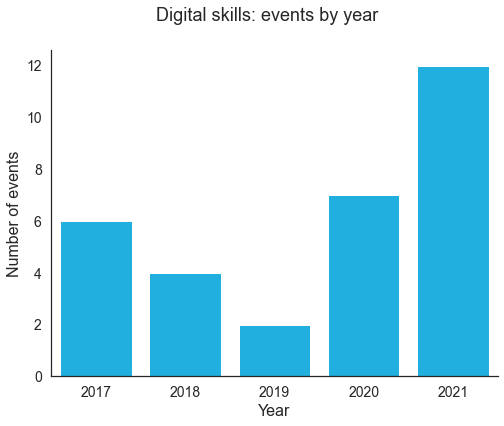

In [130]:
# Plot digital skills and NL-RSE events separately
# digital skills: 

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='digital skills', data=events_total, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of events', fontsize=16)
plt.suptitle('Digital skills: events by year', fontsize=18)
sns.despine()
    
plt.savefig('../figures/digital_skills_events_by_year', dpi=300)

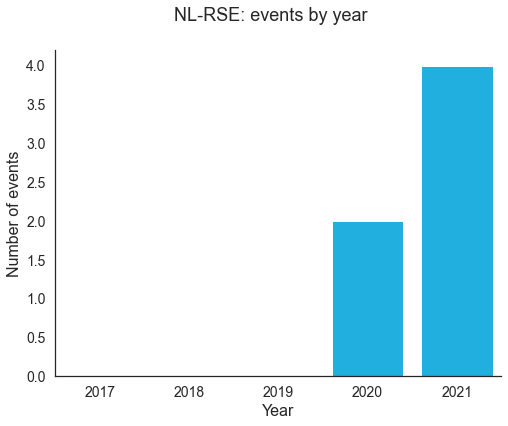

In [131]:
# NL-RSE:

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='NL-RSE', data=events_total, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of events', fontsize=16)
plt.suptitle('NL-RSE: events by year', fontsize=18)
sns.despine()
    
plt.savefig('../figures/digital_skills_events_by_year', dpi=300)

#### Participants by year

In [55]:
# filter out escience employees
df_external = df[df['affiliation'] != 'ESCIENCE CENTER']
df_external['affiliation'].value_counts()

TU DELFT                         103
UVA                               93
UTRECHT UNIVERSITY                77
VU AMSTERDAM                      60
WAGENINGEN UNIVERSITY             48
                                ... 
HOGESCHOOL ARNHEM EN NIJMEGEN      1
UNIVERSITY OF CAPE TOWN            1
UNIVERSITY OF MICHIGAN             1
ZOOLOGICAL SOCIETY OF LONDON       1
UNIVERSITY OF VIENNA               1
Name: affiliation, Length: 85, dtype: int64

In [56]:
# Create df with participants by year

df_participants_by_year = df_external.groupby('year').agg({'order_id': 'count'}).reset_index()
df_participants_by_year.rename(columns = {'order_id': 'participants'}, inplace = True)
df_participants_by_year.head(7)

year  participants
0  2016            29
1  2017           160
2  2018            67
3  2019            50
4  2020           239
5  2021           541

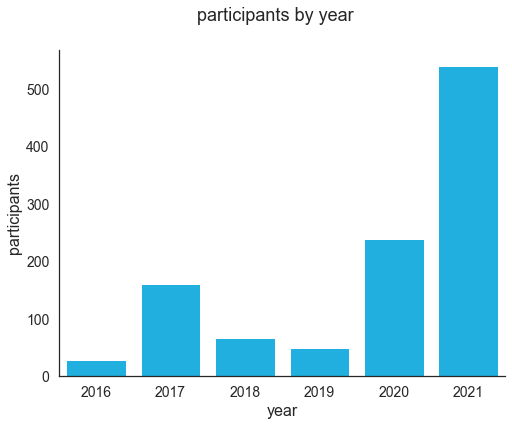

In [58]:
# plot participants by year
barplot(df_participants_by_year, 'year', 'participants')

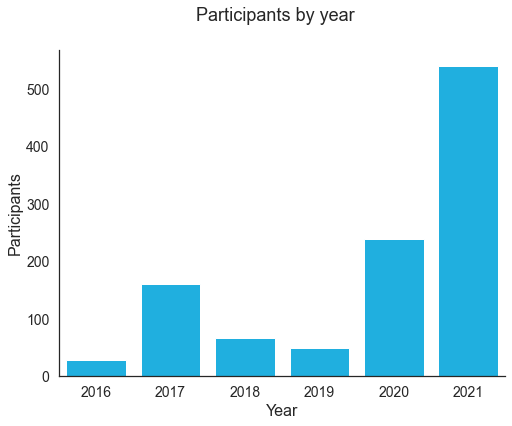

In [94]:
# save figure total participants by year

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='participants', data=df_participants_by_year, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.suptitle('Participants by year', fontsize=18)
sns.despine()
    
plt.savefig('../figures/total_participants_by_year', dpi=300)

#### Digital skills: participants by year 

In [60]:
# select digital skills events only

# only escience events
df_escience = df_external[(df_external['org_id'] == 'NLeSc') | (df_external['org_id'] == 'ePlan')]

# filter out the escience symposia
df_digitalskills = df_escience[df_escience['event'].str.contains('Symposium') == False]

# filter out the workshop on software management plans
df_digitalskills = df_digitalskills[df_digitalskills['event'].str.contains('Software Management Plans') == False]

df_digitalskills['org_id'].value_counts()

NLeSc    776
ePlan     35
Name: org_id, dtype: int64

In [61]:
# Create df with digital skills participants by year

df_digitalskills_participants_by_year = df_digitalskills.groupby('year').agg({'org_id': 'count'}).reset_index()
df_digitalskills_participants_by_year.rename(columns = {'org_id': 'participants'}, inplace = True)
df_digitalskills_participants_by_year.head()


year  participants
0  2017           104
1  2018            67
2  2019            44
3  2020           182
4  2021           414

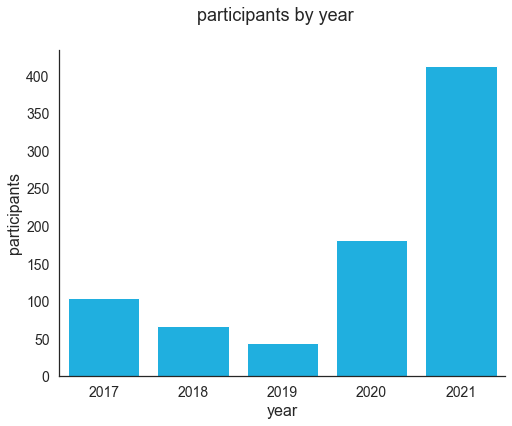

In [92]:
# plot participants by year for digital skills events

barplot(df_digitalskills_participants_by_year, 'year', 'participants')


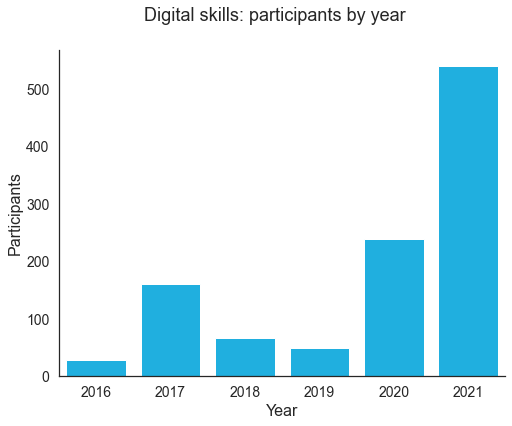

In [95]:
# Save figure

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='participants', data=df_participants_by_year, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.suptitle('Digital skills: participants by year', fontsize=18)
sns.despine()
    
plt.savefig('../figures/participants_by_year_digital_skills', dpi=300)

#### NL-RSE: participants by year 

In [63]:
# only NL-RSE events
df_nlrse = df_external[df_external['org_id'] == 'NL-RSE']
df_nlrse['org_id'].value_counts()

NL-RSE    140
Name: org_id, dtype: int64

In [64]:
# Create df with NL-RSE participants by year
df_nlrse_participants_by_year = df_nlrse.groupby('year').agg({'order_id': 'count'}).reset_index()
df_nlrse_participants_by_year.rename(columns = {'order_id': 'participants'}, inplace = True)
df_nlrse_participants_by_year.head()

year  participants
0  2020            57
1  2021            83

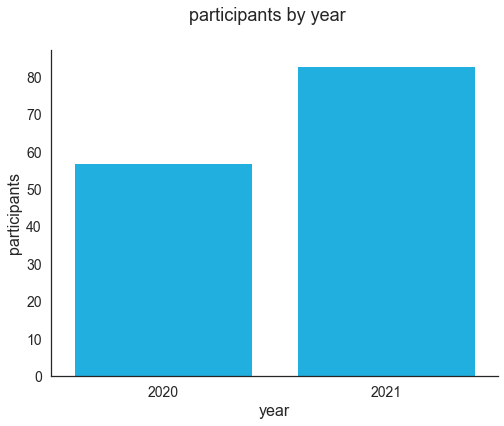

In [65]:
# plot participants by year for NL-RSE events

barplot(df_nlrse_participants_by_year, 'year', 'participants')

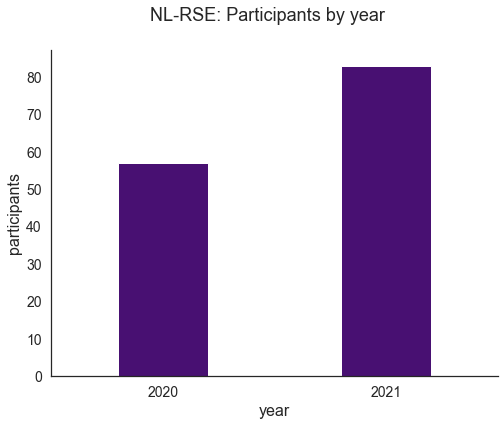

In [132]:
# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='participants', data=df_nlrse_participants_by_year, color='indigo')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('year', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('NL-RSE: Participants by year', fontsize=18)
sns.despine()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .40)

plt.savefig('../figures/barchart_NLRSE_year.png', dpi=300)

#### Participants by affiliation type

In [67]:
# Create df with participants by affiliation type

df_participants_by_affl = pd.DataFrame(df['affiliation_type'].value_counts())
df_participants_by_affl.reset_index (inplace = True)
df_participants_by_affl.rename(columns = {'index': 'affiliation type', 'affiliation_type': 'participants'}, inplace = True)
df_participants_by_affl.head()

affiliation type  participants
0                 University           622
1            eScience Center           152
2         Research Institute           124
3  University Medical Center            68
4                 Consortium            45

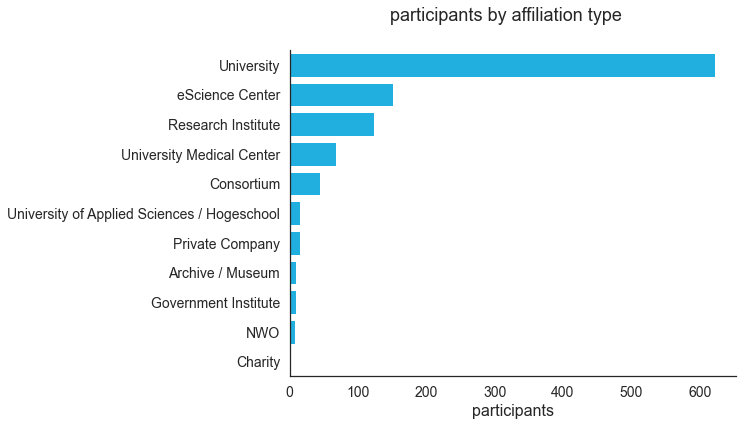

In [68]:
# Create horizontal bar chart 

barplot_horiz(df_participants_by_affl, 'participants', 'affiliation type')

In [69]:
# Excluding participants from eScience Center
# Create df with participants by affiliation type

df_participants_by_affl = pd.DataFrame(df_external['affiliation_type'].value_counts())
df_participants_by_affl.reset_index (inplace = True)
df_participants_by_affl.rename(columns = {'index': 'affiliation type', 'affiliation_type': 'participants'}, inplace = True)
df_participants_by_affl.head()

affiliation type  participants
0                                   University           622
1                           Research Institute           124
2                    University Medical Center            68
3                                   Consortium            45
4  University of Applied Sciences / Hogeschool            15

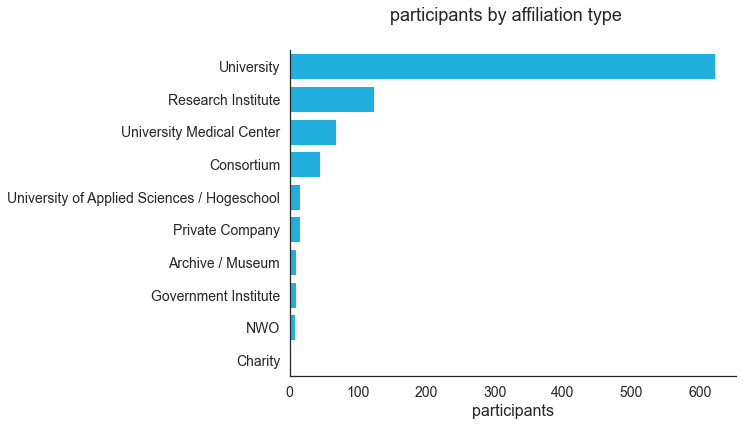

<Figure size 432x288 with 0 Axes>

In [85]:
# Create horizontal bar chart 

barplot_horiz(df_participants_by_affl, 'participants', 'affiliation type')

plt.savefig('../figures/barchart_participants_by_affiliation_type.png', dpi=300)

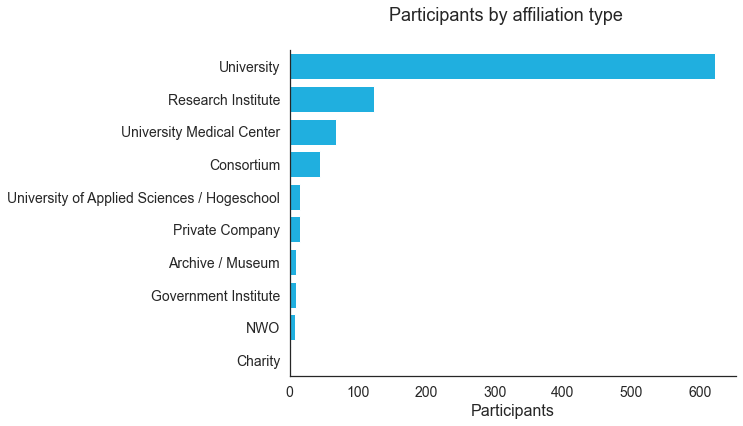

In [99]:
# save figure

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='participants', y='affiliation type', data= df_participants_by_affl, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Participants', fontsize=16)
plt.ylabel("", fontsize=16)
plt.suptitle('Participants by affiliation type', fontsize=18)
sns.despine()
    
plt.savefig('../figures/horiz_barchart_participants_by_affiliation_type.png', dpi=300, bbox_inches="tight")


#### Participants by disciplinary section

In [71]:
# Create df with participants by disciplinary section
# quite a lot of missing data but that's because of the eventbrite forms of some of the events

df_participants_by_section = pd.DataFrame(df['NLeScdis'].value_counts())
df_participants_by_section.reset_index (inplace = True)
df_participants_by_section.rename(columns = {'index': 'disciplinary section', 'NLeScdis': 'participants'}, inplace = True)
df_participants_by_section.head()

disciplinary section  participants
0                 Ph&B           305
1                   LS           217
2                  SSH           130
3                   SE            89

In [72]:
df_participants_by_section['disciplinary section'].replace("Ph&B","NSE", inplace = True)
df_participants_by_section.head()

disciplinary section  participants
0                  NSE           305
1                   LS           217
2                  SSH           130
3                   SE            89

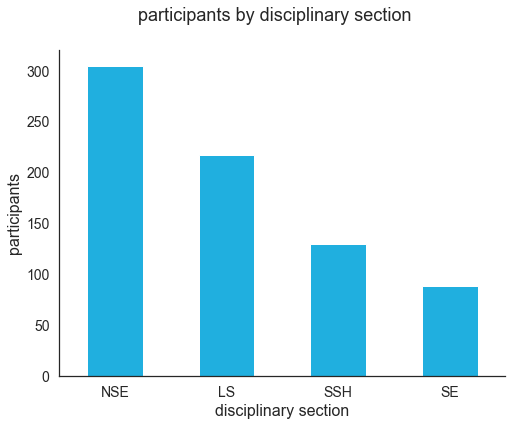

In [100]:
# create bar chart with adjusted column width

# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='disciplinary section', y='participants', data=df_participants_by_section, color='deepskyblue')

#ax.set_xticklabels(df_participants_by_section['disciplinary section'], rotation=40, ha='right')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('disciplinary section', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('participants by disciplinary section', fontsize=18)
sns.despine()

change_width(ax, .50)

plt.savefig('../figures/barchart_participants_by_section.png', dpi=300)

### <span style='background:yellow'> Seems strange that Sust & Env is so low, classification issue? </span>

#### Participants by affiliation

In [75]:
# Create df with participants by affiliation

df_participants_by_affiliation = pd.DataFrame(df['affiliation'].value_counts())
df_participants_by_affiliation.reset_index (inplace = True)
df_participants_by_affiliation.rename(columns = {'index': 'affiliation', 'affiliation': 'participants'}, inplace = True)
df_participants_by_affiliation.head(20)

affiliation  participants
0                                ESCIENCE CENTER           152
1                                       TU DELFT           103
2                                            UVA            93
3                             UTRECHT UNIVERSITY            77
4                                   VU AMSTERDAM            60
5                          WAGENINGEN UNIVERSITY            48
6                              LEIDEN UNIVERSITY            45
7                        UNIVERSITY OF GRONINGEN            44
8                           UNIVERSITY OF TWENTE            37
9                    RADBOUD UNIVERSITY NIJMEGEN            33
10                                          TU/E            31
11                                     SURF SARA            28
12                         MAASTRICHT UNIVERSITY            28
13                                    ERASMUS MC            27
14                                        ASTRON            23
15                                   UMC UTRECHT            19
16  NETHERLANDS INSTITUTE OF ECOLOGY (NIOO-KNAW)            14
17                                     DANS-KNAW            13
18              LEIDEN UNIVERSITY MEDICAL CENTER            12
19        NETHERLANDS INSTITUTE FOR NEUROSCIENCE            11

In [79]:
# Excluding participants from eScience Center
# Create df with participants by affiliation type

df_participants_by_affiliation = pd.DataFrame(df_external['affiliation'].value_counts())
df_participants_by_affiliation.reset_index (inplace = True)
df_participants_by_affiliation.rename(columns = {'index': 'affiliation', 'affiliation': 'participants'}, inplace = True)
df_participants_by_affiliation.head(30)

affiliation  participants
0                                          TU DELFT           103
1                                               UVA            93
2                                UTRECHT UNIVERSITY            77
3                                      VU AMSTERDAM            60
4                             WAGENINGEN UNIVERSITY            48
5                                 LEIDEN UNIVERSITY            45
6                           UNIVERSITY OF GRONINGEN            44
7                              UNIVERSITY OF TWENTE            37
8                       RADBOUD UNIVERSITY NIJMEGEN            33
9                                              TU/E            31
10                                        SURF SARA            28
11                            MAASTRICHT UNIVERSITY            28
12                                       ERASMUS MC            27
13                                           ASTRON            23
14                                      UMC UTRECHT            19
15     NETHERLANDS INSTITUTE OF ECOLOGY (NIOO-KNAW)            14
16                                        DANS-KNAW            13
17                 LEIDEN UNIVERSITY MEDICAL CENTER            12
18  NETHERLANDS INSTITUTE FOR SPACE RESEARCH (SRON)            11
19                                             SURF            11
20           NETHERLANDS INSTITUTE FOR NEUROSCIENCE            11
21                                             KNMI             9
22                         HOGESCHOOL VAN AMSTERDAM             9
23                                       RIJK ZWAAN             8
24                   CENTRUM WISKUNDE & INFORMATICA             8
25                                              NWO             8
26                               TILBURG UNIVERSITY             6
27                                    UMC AMSTERDAM             6
28                          KONINKLIJKE BIBLIOTHEEK             6
29                                HUYGENS INSTITUTE             6

In [78]:
df_participants_by_affiliation.to_csv('participants_by_affiliation.csv')